In [1]:
import numpy as np
from scipy import stats
from matplotlib.pyplot import plot
import scipy.stats as stats
import pandas as pd
import pylab
import statsmodels.api as sm
from scipy.stats import shapiro
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
class DataInfo():
    def __init__(self, filename):
        import pandas as pd
        import numpy as np
        import os
        self.data = pd.read_excel(filename)

    def head(self, rows=None):
        #veri tablosunun ilk 5 satırı
        if rows != None:
            return self.data.head(rows)
        return self.data.head()
               
    def isnull(self):
        return self.data.isnull()
    
    def describe(self):
        return self.data.describe()
    
    def info(self):
        return self.data.info()
    

In [3]:
class correlation():
    def __init__(self, data):
        import pandas as pd
        import numpy as np
        self.data = data
        
    def corr(self, threshold):
        col_corr = set()
        corr = df.corr()
        for i in range(len(corr.columns)):
            for j in range(i):
                if (corr.iloc[i, j] >= threshold) and (corr.columns[j] not in col_corr):
                    colname = corr.columns[i]
                    col_corr.add(colname)
                    if colname in df.columns:
                        del df[colname]
                        
        return df

In [4]:
class Visualize():
    def __init__(self, data):
        import seaborn as sns
        import matplotlib.pyplot as plt
        self.data = data
    
    def hist(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df = self.data
        numeric_cols = df.select_dtypes(include=["int64", "float64"])
        #fig, ax = plt.subplots(len(numeric_cols.columns), 1, figsize = (10, 30))
        #print(numeric_cols.iloc[:,0])
        for i in range (len(numeric_cols.columns)):
            plt.hist(numeric_cols.iloc[:,i], bins=40)
            #ax[i].hist(numeric_cols.iloc[:,i], bins=40)
            plt.title(numeric_cols.columns[i])
            plt.show()
            
    
    def boxplot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df = self.data
        numeric_cols = df.select_dtypes(include=["int64", "float64"])
        numeric_cols.boxplot(figsize=(20,15))
        
    
    def countplot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df = self.data
        categoric_cols = df.select_dtypes(exclude=["int64", "float64"])
        fig, ax = plt.subplots(len(categoric_cols.columns),1, figsize=(10,7))
        for i in range (len(categoric_cols.columns)):
            sns.countplot(x=categoric_cols.iloc[:,i],palette='pastel', ax = ax[i])
            
    def correlation(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df = self.data
        fig,ax = plt.subplots(figsize=(30, 30))
        sns.heatmap(df.corr(), ax=ax, annot=True, 
            linewidths=0.05, fmt= '.2f',cmap="summer_r")
        plt.show()
        
    def jointplot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df = self.data
        numeric_cols = df.select_dtypes(include=["int64", "float64"])
        #fig, ax = plt.subplots(len(numeric_cols.columns),1, figsize=(10,7))
        for i in range (len(numeric_cols.columns)):
            for j in range(len(numeric_cols.columns)):
                if i == j:
                    continue
                sns.jointplot(x=numeric_cols.iloc[:,i],y=numeric_cols.iloc[:,j], data=df, kind="reg")
        #plt.show()

In [5]:
df = DataInfo("HW_Data_Set.xlsx").data
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
df.replace('?',np.mean)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-28.2,-40,-11,-270,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-28.6,-41,-12,-271,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-37.2,-49,-21,-280,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-48.9,-61,-33,-292,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [9]:
dfremovedcorr = correlation(DataInfo).corr(0.6)

In [10]:
dfremovedcorr

,ind_5,ind_8,ind_9,ind_14,ind_17,ind_18,ind_23,ind_26,ind_27,ind_28,...,ind_347,ind_349,ind_351,ind_403,ind_404,ind_416,ind_420,ind_422,20_target,50_target
0,19,100.000000,85.714286,23.80,12.060000,9.1100,56,-0.002670,0.000010,66.666667,...,0.000000,0.0,0.0,0.045130,-0.044678,-49.6,-152,-353,15.135802,35.625252
1,24,100.000000,78.571429,11.45,11.326667,9.2225,63,-0.003111,-0.000191,66.666667,...,0.000000,0.0,0.0,0.035314,-0.034961,-55.6,-158,-359,15.143348,35.643013
2,30,100.000000,71.428571,8.75,10.973333,9.3125,65,-0.003530,-0.000375,66.666667,...,0.000000,0.0,0.0,0.005860,-0.005802,-58.4,-160,-362,15.146870,35.651301
3,37,100.000000,64.285714,7.80,10.426667,9.4150,68,-0.003961,-0.000641,66.666667,...,0.000000,0.0,0.0,-0.018252,0.018070,-61.8,-166,-367,15.153283,0.000000
4,41,100.000000,57.142857,14.90,11.406667,9.8925,91,-0.004624,-0.000319,66.666667,...,0.000000,0.0,0.0,-0.007183,0.007111,-79.8,-186,-388,-15.179065,-35.727079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,57.142857,28.571429,9.70,15.100000,16.2175,37,-0.003825,-0.001080,-66.666667,...,10.000000,0.0,0.0,-0.006418,0.006354,-28.2,-11,-270,14.673247,-34.536532
6163,22,50.000000,21.428571,7.65,14.753333,16.1175,36,-0.003859,-0.001114,-66.666667,...,9.090909,0.0,0.0,-0.009019,0.008929,-28.6,-12,-271,14.673750,-34.537716
6164,19,42.857143,14.285714,8.95,14.613333,16.3125,44,-0.004010,-0.001265,66.666667,...,8.333333,0.0,0.0,-0.004306,0.004263,-37.2,-21,-280,-14.684566,-34.563173
6165,19,100.000000,7.142857,13.55,13.606667,16.4200,55,-0.003807,-0.000942,66.666667,...,92.307692,0.0,0.0,0.012664,-0.012537,-48.9,-33,-292,-14.699280,-34.597806


In [11]:
correlate=dfremovedcorr.corr()

In [12]:
correlate[['20_target', '50_target']].sort_values(by='50_target',ascending=False)

,20_target,50_target
50_target,0.384076,1.000000
20_target,1.000000,0.384076
ind_18,0.037185,0.127057
ind_17,0.041799,0.121097
ind_332,0.089679,0.104057
ind_23,0.029164,0.086637
ind_310,0.014372,0.072983
ind_14,0.015320,0.072728
ind_5,0.060969,0.068989
ind_309,0.021217,0.059441


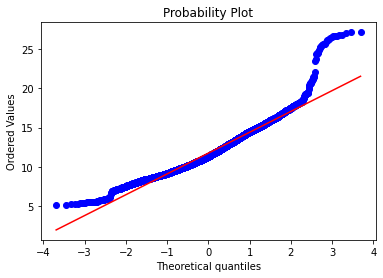

In [13]:
stats.probplot(dfremovedcorr["ind_18"], dist = "norm", plot=pylab)
pylab.show()

In [14]:
X = dfremovedcorr[["ind_18"]]

In [15]:
y = dfremovedcorr["50_target"]

In [16]:
lm = sm.OLS(y,X)  #error'lerin normal dağılımdan gelmesi 
#                  konusunda MLE'ye göre daha esnek bir metod
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              17.54
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    2.86e-05
Time:                        17:33:32   Log-Likelihood:                         -30611.
No. Observations:                6167   AIC:                                  6.122e+04
Df Residuals:                    6166   BIC:                                  6.123e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18        -0.1531      0.037     -4.188      0.000      -0.225      -0.081
==============================================================================
Omnibus:                    22682.810   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.969
Skew:                           0.162   Prob(JB):                    9.54e-209
Kurtosis:                       1.097   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

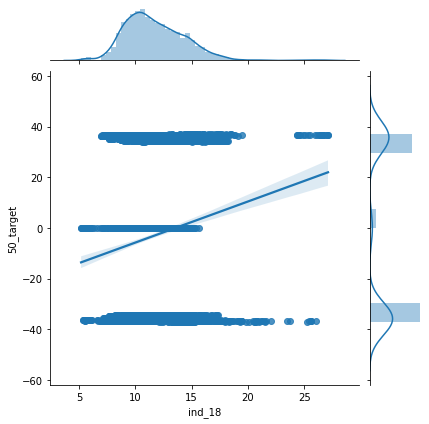

In [17]:
sns.jointplot(x = "ind_18", y="50_target", data= dfremovedcorr, kind="reg")

In [18]:
target1 = dfremovedcorr.loc[dfremovedcorr["50_target"]> 30]
target2 = dfremovedcorr.loc[dfremovedcorr["50_target"]< -30]
target3 = dfremovedcorr.loc[(dfremovedcorr["50_target"]> -30)
                           & (dfremovedcorr["50_target"]< 30)]

In [19]:
corr1 = target1.corr()
corr2 = target2.corr()
corr3 = target3.corr()

In [20]:
corr1[['20_target', '50_target']].sort_values(by='50_target',ascending=False)

,20_target,50_target
50_target,0.057692,1.000000
ind_237,0.010915,0.411647
ind_309,0.045530,0.383009
ind_316,0.028967,0.348963
ind_83,0.087032,0.317616
ind_332,0.057634,0.278648
ind_327,0.013131,0.277779
ind_338,0.049625,0.185500
ind_311,-0.016175,0.169665
ind_225,0.021307,0.166177


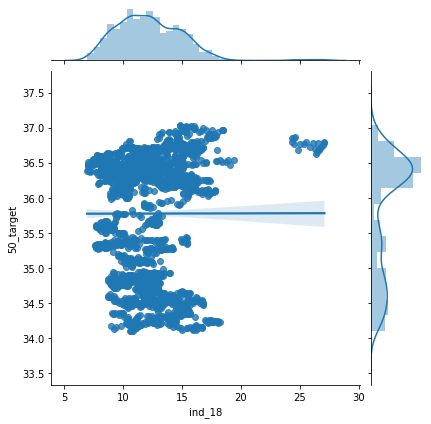

In [21]:
sns.jointplot(x = "ind_18", y="50_target", data= target1, kind="reg")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


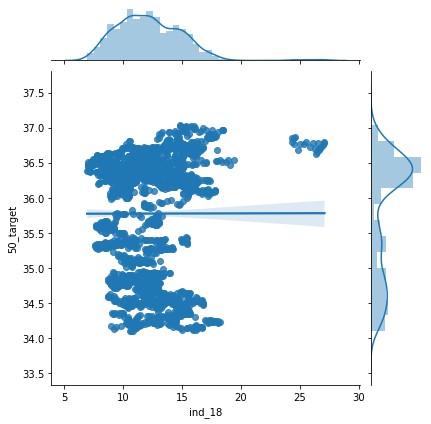

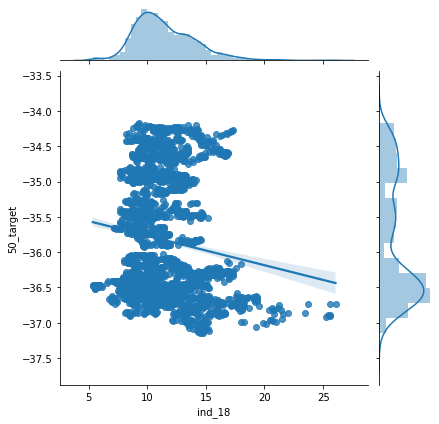

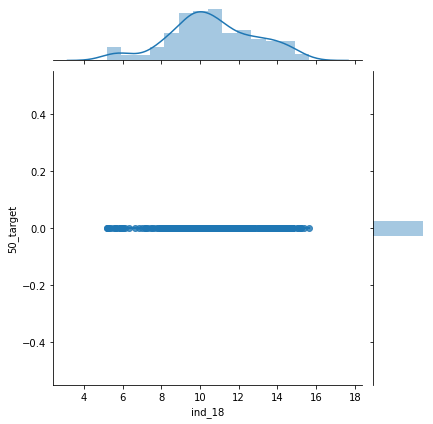

In [22]:
sns.jointplot(x = "ind_18", y="50_target", data= target1, kind="reg")
sns.jointplot(x = "ind_18", y="50_target", data= target2, kind="reg")
sns.jointplot(x = "ind_18", y="50_target", data= target3, kind="reg")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


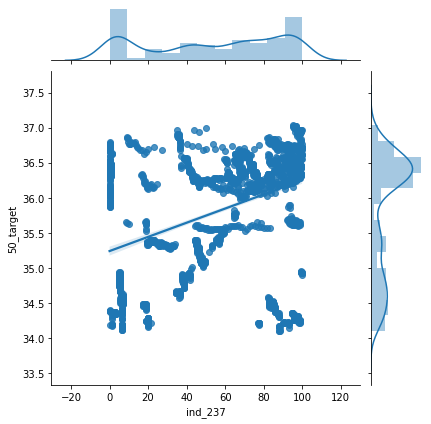

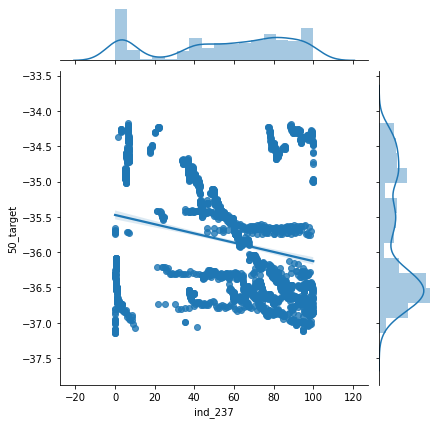

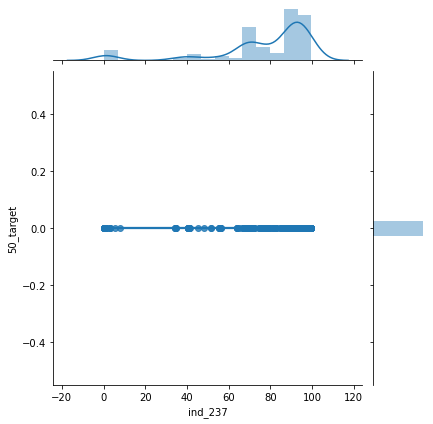

In [23]:
sns.jointplot(x = "ind_237", y="50_target", data= target1, kind="reg")
sns.jointplot(x = "ind_237", y="50_target", data= target2, kind="reg")
sns.jointplot(x = "ind_237", y="50_target", data= target3, kind="reg")

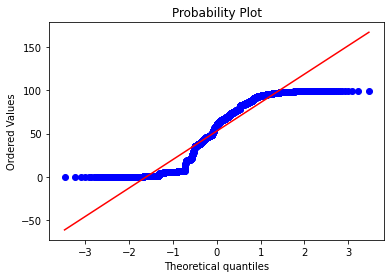

In [24]:
stats.probplot(target1["ind_237"], dist = "norm", plot=pylab)
pylab.show()

In [25]:
X = target1[["ind_237"]]
y = target1["50_target"]

In [26]:
lm = sm.OLS(y,X)  #error'lerin normal dağılımdan gelmesi 
#                  konusunda MLE'ye göre daha esnek bir metod
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              6364.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:33:47   Log-Likelihood:                         -11585.
No. Observations:                2643   AIC:                                  2.317e+04
Df Residuals:                    2642   BIC:                                  2.318e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_237        0.4750      0.006     79.778      0.000       0.463       0.487
==============================================================================
Omnibus:                    55624.448   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.170
Skew:                           0.235   Prob(JB):                     2.84e-50
Kurtosis:                       1.640   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = target2[["ind_237"]]
y = target2["50_target"]

In [28]:
lm = sm.OLS(y,X)  #error'lerin normal dağılımdan gelmesi 
#                  konusunda MLE'ye göre daha esnek bir metod
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              8939.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:33:47   Log-Likelihood:                         -13574.
No. Observations:                3139   AIC:                                  2.715e+04
Df Residuals:                    3138   BIC:                                  2.716e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_237       -0.4844      0.005    -94.545      0.000      -0.494      -0.474
==============================================================================
Omnibus:                     1132.889   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.767
Skew:                          -0.440   Prob(JB):                     3.52e-55
Kurtosis:                       1.930   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = dfremovedcorr.drop(["20_target", "50_target", "ind_109", "ind_422","ind_420"], axis=1)
y = dfremovedcorr["50_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.084
Method:                 Least Squares   F-statistic:                              10.18
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.63e-71
Time:                        17:33:47   Log-Likelihood:                         -24256.
No. Observations:                4933   AIC:                                  4.861e+04
Df Residuals:                    4884   BIC:                                  4.893e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.7347      0.088      8.311      0.000       0.561       0.908
ind_8          0.0201      0.020      1.028      0.304      -0.018       0.058
ind_9          0.0117      0.020      0.600      0.549      -0.027       0.050
ind_14        -0.0345      0.108     -0.320      0.749      -0.246       0.177
ind_17         0.6918      0.249      2.776      0.006       0.203       1.180
ind_18         0.6562      0.242      2.712      0.007       0.182       1.130
ind_23        -0.0516      0.065     -0.796      0.426      -0.179       0.075
ind_26       375.8364   1080.091      0.348      0.728   -1741.629    2493.301
ind_27     -3934.8948   1481.836     -2.655      0.008   -6839.961   -1029.829
ind_28        -0.0004      0.010     -0.045      0.964      -0.020       0.019
ind_30         0.0042      0.009      0.475      0.635      -0.013       0.021
ind_40         0.4951      0.767      0.645      0.519      -1.009       2.000
ind_42         0.0811      0.267      0.304      0.761      -0.443       0.605
ind_47         0.7020      0.098      7.143      0.000       0.509       0.895
ind_82         6.4322      0.984      6.537      0.000       4.503       8.361
ind_83         0.2824      0.066      4.293      0.000       0.153       0.411
ind_88       964.6242   1150.128      0.839      0.402   -1290.144    3219.393
ind_116       -0.2355      0.100     -2.348      0.019      -0.432      -0.039
ind_134        0.1006      0.119      0.846      0.398      -0.132       0.334
ind_136        0.2328      0.162      1.433      0.152      -0.086       0.551
ind_164       -0.4873      0.105     -4.638      0.000      -0.693      -0.281
ind_172        0.0712      0.030      2.343      0.019       0.012       0.131
ind_176        0.0453      0.030      1.520      0.129      -0.013       0.104
ind_179        0.2440      0.162      1.503      0.133      -0.074       0.562
ind_217        0.8130      0.573      1.418      0.156      -0.311       1.937
ind_225      -58.9085     52.554     -1.121      0.262    -161.938      44.121
ind_228      -14.0595      3.209     -4.382      0.000     -20.350      -7.769
ind_237        0.0074      0.018      0.400      0.689      -0.029       0.043
ind_239     1.091e+04   4433.652      2.460      0.014    2213.474    1.96e+04
ind_241        0.0028      0.024      0.118      0.906      -0.043       0.049
ind_309     6071.1595   8921.060      0.681      0.496   -1.14e+04    2.36e+04
ind_310        2.7010      1.295      2.086      0.037       0.163       5.239
ind_311       -0.0803      0.029     -2.793      0.005      -0.137      -0.024
ind_315       -0.0752      0.822     -0.091      0.927      -1.687       1.536
ind_316        0.0373      0.018      2.125      0.034       

In [31]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[19.90140318368165,
 6.247571066564305,
 6.2976276943407345,
 9.432099563291265,
 44.14249412795949,
 38.26883442597462,
 23.778266337520243,
 36.305320475502945,
 3.7005516956580773,
 1.9923724459710799,
 3.8769787390673236,
 33.73924864357333,
 12.094853480000944,
 19.387341749800633,
 4.212068157062547,
 2.6403924531201954,
 1.923247449502536,
 10.695912831171448,
 3.860896824518597,
 8.033137162242307,
 5.985587086336138,
 1.648063256454713,
 1.8122238695676123,
 4.349290380470715,
 2.685648692041418,
 2.048863935477039,
 68.54126804797232,
 6.293086160552022,
 2.169476890766476,
 22.56134725094955,
 1.9453067035788536,
 2.761165808583043,
 35.441171352843604,
 3.2264315704931015,
 11.032660249025419,
 2.9701793229779727,
 2.8841562290913476,
 4.075267086387986,
 3.6916469259540166,
 5.498993947262741,
 6.502162046707314,
 1.5531402014432139,
 3.905542406274377,
 3.738328637788921,
 7.089127524260947,
 6.63241476736602,
 21029626333.125523,
 21029626333.125523,
 1.7851917777400448]

In [32]:
Xdroplist=[]
for i in range(X.shape[1]):
    if variance_inflation_factor(X.values, i) > 10:
        Xdroplist.append(i)


In [33]:
for i in range(len(Xdroplist)):
    print (X.iloc[:,Xdroplist[i]])

0       19
1       24
2       30
3       37
4       41
        ..
6162    27
6163    22
6164    19
6165    19
6166    19
Name: ind_5, Length: 6167, dtype: int64
0       12.060000
1       11.326667
2       10.973333
3       10.426667
4       11.406667
          ...    
6162    15.100000
6163    14.753333
6164    14.613333
6165    13.606667
6166    13.020000
Name: ind_17, Length: 6167, dtype: float64
0        9.1100
1        9.2225
2        9.3125
3        9.4150
4        9.8925
         ...   
6162    16.2175
6163    16.1175
6164    16.3125
6165    16.4200
6166    16.4500
Name: ind_18, Length: 6167, dtype: float64
0       56
1       63
2       65
3       68
4       91
        ..
6162    37
6163    36
6164    44
6165    55
6166    47
Name: ind_23, Length: 6167, dtype: int64
0      -0.002670
1      -0.003111
2      -0.003530
3      -0.003961
4      -0.004624
          ...   
6162   -0.003825
6163   -0.003859
6164   -0.004010
6165   -0.003807
6166   -0.002142
Name: ind_26, Length: 6167, dt

In [34]:
X = dfremovedcorr.drop(["20_target", "50_target", "ind_109", "ind_422","ind_420","ind_18","ind_40","ind_228","ind_241","ind_311","ind_316"], axis=1)
y = dfremovedcorr["50_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              10.12
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    4.88e-63
Time:                        17:33:52   Log-Likelihood:                         -24286.
No. Observations:                4933   AIC:                                  4.866e+04
Df Residuals:                    4890   BIC:                                  4.894e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.7040      0.087      8.122      0.000       0.534       0.874
ind_8         -0.0265      0.018     -1.463      0.143      -0.062       0.009
ind_9         -0.0312      0.018     -1.712      0.087      -0.067       0.005
ind_14         0.0249      0.108      0.232      0.817      -0.186       0.236
ind_17         0.3946      0.212      1.860      0.063      -0.021       0.810
ind_23        -0.0520      0.064     -0.807      0.420      -0.178       0.074
ind_26      -432.0016   1063.366     -0.406      0.685   -2516.676    1652.673
ind_27     -2889.4856   1463.717     -1.974      0.048   -5759.029     -19.942
ind_28         0.0011      0.010      0.110      0.912      -0.018       0.021
ind_30         0.0052      0.009      0.595      0.552      -0.012       0.022
ind_42         0.1445      0.268      0.540      0.589      -0.380       0.669
ind_47         0.6535      0.098      6.673      0.000       0.462       0.846
ind_82         4.8709      0.947      5.145      0.000       3.015       6.727
ind_83         0.3008      0.066      4.562      0.000       0.172       0.430
ind_88      1473.6112   1152.184      1.279      0.201    -785.187    3732.410
ind_116       -0.2363      0.099     -2.378      0.017      -0.431      -0.042
ind_134        0.0462      0.119      0.388      0.698      -0.187       0.280
ind_136        0.2517      0.163      1.543      0.123      -0.068       0.572
ind_164       -0.4652      0.105     -4.418      0.000      -0.672      -0.259
ind_172        0.0657      0.030      2.160      0.031       0.006       0.125
ind_176        0.0454      0.030      1.540      0.124      -0.012       0.103
ind_179        0.1623      0.163      0.998      0.318      -0.157       0.481
ind_217       -0.0491      0.548     -0.089      0.929      -1.124       1.026
ind_225      -76.6094     48.223     -1.589      0.112    -171.149      17.930
ind_237       -0.0470      0.015     -3.232      0.001      -0.075      -0.018
ind_239     1.424e+04   4093.809      3.478      0.001    6212.270    2.23e+04
ind_309     2.146e+04   7919.468      2.710      0.007    5938.292     3.7e+04
ind_310        5.0794      1.215      4.181      0.000       2.698       7.461
ind_315        0.2672      0.722      0.370      0.711      -1.148       1.683
ind_324    -2.919e+04   5250.748     -5.559      0.000   -3.95e+04   -1.89e+04
ind_327       -0.0621      0.018     -3.486      0.000      -0.097      -0.027
ind_330        3.7308      1.896      1.967      0.049       0.013       7.448
ind_332        0.1376      0.026      5.326      0.000       0.087       0.188
ind_334     3.273e+04   1.39e+04      2.360      0.018    5540.725    5.99e+04
ind_338        9.8347      3.053      3.221      0.001       

In [36]:
influence = model.get_influence()

In [37]:
resid_student = influence.resid_studentized_external

Leverage vs Studentized Residuals


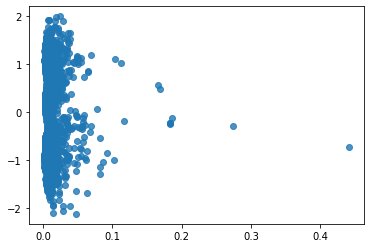

In [38]:
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print('Leverage vs Studentized Residuals')
sns.regplot(leverage, model.resid_pearson, fit_reg = False)

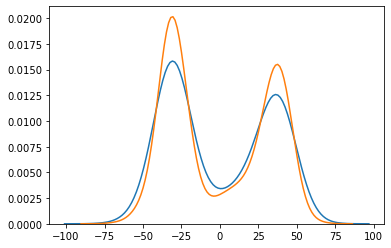

In [39]:
modelres = pd.concat([dfremovedcorr , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(modelres.resid), bw=10)
sns.distplot(np.array(modelres.resid), hist=False)

In [40]:
#visual = Visualize(df.data)

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
#visual.hist()